# Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialgraphs2019/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday October 1st at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via http://peergrade.io/ (invite code: KF2X3M)

# Part 1: Binning degree distributions


* Binning real numbers
  * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.
  * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
  
  **Answer** `numpy.histogram` returns an array of values of the histogram, and an array of the bin edges. They are not the same length. The bin edge array is one longer than the value array.
  * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.
  
  **Answer** We took off the last edge in the bin edge array. We can do this because the last edge tells the histogram where to stop, which we don't have to worry about.
* Binning integers
  * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
  * Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.
  
  **Answer** The sum over bin counts is the total number of values in the histogram. The binning-vectors first and last element represent the first and last points of the Poisson distribution.
  * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 
* Binning and plotting degree distributions. 
  * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
**Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
  * Now, use `networkx` to create the graph and extract the degree distribution.
  * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import networkx as nx
%matplotlib inline  

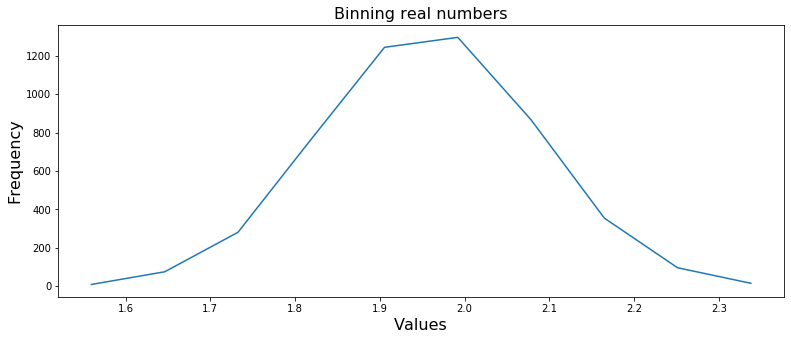

In [2]:
# Binning real numbers

random_data = []
for i in range(5000):
    random_data.append(random.normalvariate(2, 0.125))
hist_info = np.histogram(random_data, 10)

plt.figure(figsize=(13,5))
plt.plot(hist_info[1][:-1], hist_info[0])
plt.title('Binning real numbers', fontsize=16)
plt.xlabel('Values', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()

Max value: 22
Min value: 1


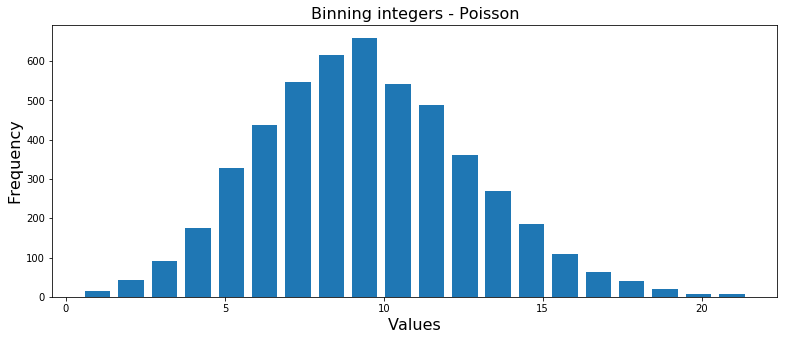

In [75]:
# Binning integers

random_poisson = np.random.poisson(10, 5000)
max_random_poisson = max(random_poisson)
min_random_poisson = min(random_poisson)
print(f'Max value: {max_random_poisson}')
print(f'Min value: {min_random_poisson}')
v = np.linspace(min_random_poisson, max_random_poisson, max_random_poisson-min_random_poisson)

hist_poisson = np.histogram(random_poisson, bins = v)

plt.figure(figsize=(13,5))
plt.bar(hist_poisson[1][:-1], hist_poisson[0])
plt.xlabel('Values', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Binning integers - Poisson', fontsize=16)
plt.show()

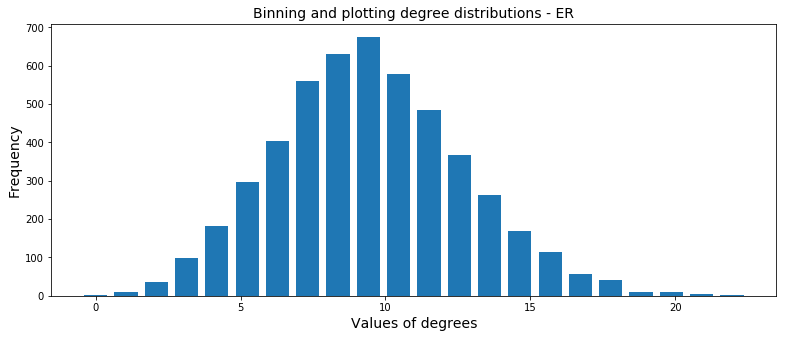

In [78]:
k = 10 # poisson lambda
N = 5000

# p has been isolated in the formula given in the hint
p = k/(N-1)

er_graph = nx.erdos_renyi_graph(N, p)
degrees = [er_graph.degree(v) for v in er_graph.nodes()]
bins = np.linspace(np.min(degrees), np.max(degrees), np.max(degrees) - np.min(degrees))

hist_er = np.histogram(degrees, bins = bins)

plt.figure(figsize = (13,5))
plt.bar(hist_er[1][:-1], hist_er[0])
plt.title('Binning and plotting degree distributions - ER', fontsize=14)
plt.xlabel('Values of degrees', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# Part 2: Random networks and plotting in `networkx`
 
* In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.
* Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
  * Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)
  * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
  * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
  * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

Consider an Erdős-Rényi network with N = 3,000 nodes, connected to each other with probability $p = 10^{-3}$.


**Question a):** What is the expected number of links, 〈L〉?

* $\langle L \rangle= \frac{pN(N-1)}{2} = \frac{10^{-3}*3000*2999}{2} = 4498.5$

**Question b):** In which regime is the network?
* Supercritical Regime. This is because $p > \frac{1}{N} = 10^{-3} > \frac{1}{3000}$

**Question c):** Calculate the probability pc so that the network is at the critical point
* $p_c = \frac{1}{N-1} = 1/2999 = 0.00033$

**Question d):** Given the linking probability $p = 10^{-3}$, calculate the number of nodes $N_{cr}$ so that the network has only one component.

* To calculate when the network becomes a fully connected one which only has a single component, we need that $\left<k\right> > \ln N$. Inserting the definition of $\left<k\right>$ in the equality we can isolate the N's to $p>\frac{\ln N}{N-1}$. One can then plot the expression on right hand side to see when it passes $p$ or simply solve the equality with an algebraic solver. The latter was done and got that $N \approx 9120$. We can see if this is true.

**Question e):** For the network in (d), calculate the average degree $\langle k_{cr} \rangle$ and the average distance between two randomly chosen nodes $\langle d \rangle$.

* To calculate $\left< k_{cr}\right>$ we are going to use $N_{cr}$ to compute the average degree with $p=10^{-3}$. With that value we can compute the average distance between two random nodes with the fomrula $\left< d \right> \approx \frac{\ln N}{\ln\left<k\right>}$

In [27]:
p = 10**-3
N_cr = 9120
print("Critical Average Degree: ", p*(N_cr-1), '  ln(N_cr) = ', np.round(np.log(N_cr),3))
print('Average distance between two nodes: ', np.log(N_cr)/np.log(p*(N_cr-1)))

Critical Average Degree:  9.119   ln(N_cr) =  9.118
Average distance between two nodes:  4.12522144293705


**Question f):** Calculate the degree distribution $p_k$ of this network (approximate with a Poisson degree distribution).

We will be using the formula defined in BOX 3.11 in chapter 3:  $p_k({\langle k \rangle})= e^{−\langle k \rangle}\frac{\langle k \rangle ^k}{k!}$


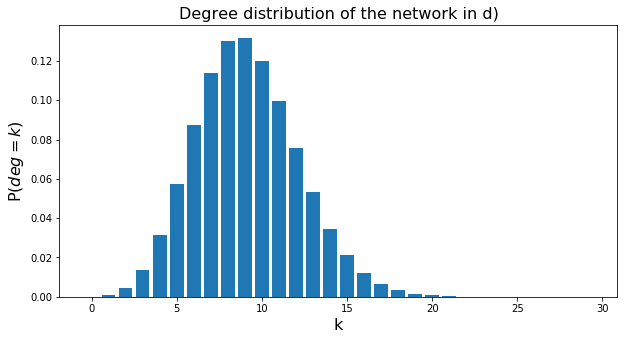

In [31]:
# Define the function first
avg_deg = p*(N_cr-1)

pois_dist = lambda k: np.exp(-avg_deg)*(avg_deg**k/np.math.factorial(k))

dens_vals = []
k_vals = []
for k in range(0,30):
    k_vals.append(k)
    dens_vals.append(pois_dist(k))



plt.figure(figsize=(10,5))
plt.bar(k_vals, dens_vals)
plt.xlabel('k',fontsize=16)
plt.ylabel('P($deg=k$)', fontsize=16)
plt.title('Degree distribution of the network in d)', fontsize = 16)
plt.show()

C:\Users\Bruger\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


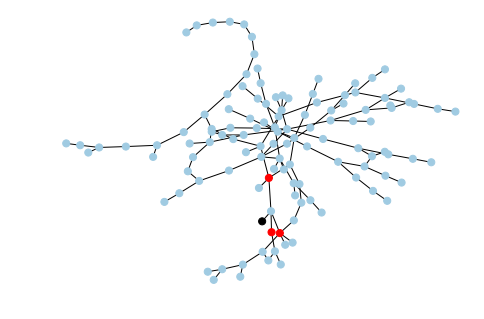

In [32]:
# Here we do the second exercise of Part 2 of drawing a random network and extracting the GCC with more...

N = 200
pk = 1.5
p = pk / (N-1)
random_graph = nx.erdos_renyi_graph(N, p)

gcc = max(nx.connected_component_subgraphs(random_graph), key=len)
random_node = random.choice(list(gcc.nodes))
random_node_index = list(gcc.nodes()).index(random_node)
lengths = nx.single_source_shortest_path_length(gcc, random_node)
nodes_with_distance_2 = [key for key, value in lengths.items() if value == 2]

colours = ['#A0CBE2'] * len(list(gcc.nodes()))
colours[random_node_index] = '#000000'
for node in nodes_with_distance_2:
    colours[list(gcc.nodes()).index(node)] = '#ff0000'

nx.draw(gcc, node_color=colours, node_size=50)

# Part 3: Watts-Strogatz Networks

* Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.
* Let's understand the behavior of the WS model as we increase _p_ in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).


![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ws.png)

In [8]:
N = 500
k = 4
p_rewiring_0 = 0
p_rewiring_1 = 0.1
p_rewiring_2 = 1

G0 = nx.watts_strogatz_graph(N, 4, p_rewiring_0)
G1 = nx.watts_strogatz_graph(N, 4, p_rewiring_1)
G2 = nx.watts_strogatz_graph(N, 4, p_rewiring_2)

sp0 = nx.average_shortest_path_length(G0)
sp1 = nx.average_shortest_path_length(G1)
sp2 = nx.average_shortest_path_length(G2)

print(f"Average shortest path of G0: {sp0}")
print(f"Average shortest path of G1: {sp1}")
print(f"Average shortest path of G2: {sp2}")

Average shortest path of G0: 62.875751503006015
Average shortest path of G1: 7.285450901803607
Average shortest path of G2: 4.765466933867735


**Question:** Describe what happens to the network when $p=1$.

**Answer:** It becomes a randomized graph. The closest it will get to a randomized graph is at p = 1.

In [33]:
# We now create 50 random networks for different values of p's for a fixed number of nodes and see how the average distance
# behaves as p increases. The plot can be seen further down.
N = 500
k = 4
p_values = [0, 0.01, 0.03, 0.05, 0.1, 0.2]

networks = []
paths = []
standard_deviations = []

def generate_graphs(network_list, N, k):
    for p in p_values:
        for i in range(50):
            network_list.append(nx.watts_strogatz_graph(N, k, p))
            
generate_graphs(networks, N, k)

In [34]:
paths = [nx.average_shortest_path_length(G) for G in networks]

In [35]:
standard_deviations = [np.std(paths[50*i:50*(i+1)]) for i in range(0, len(p_values))]
average_paths = [np.average(paths[50*i:50*(i+1)]) for i in range(0, len(p_values))]

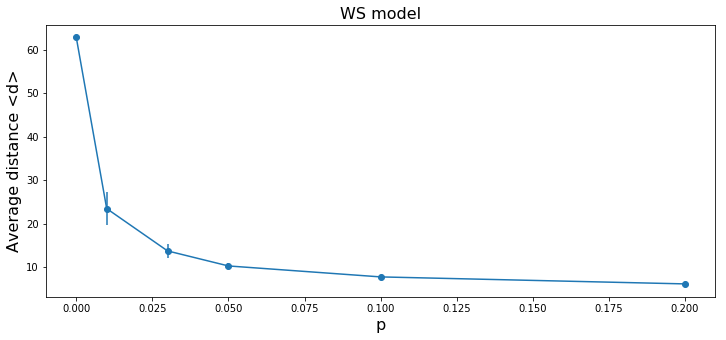

In [80]:
plt.figure(figsize=(12,5))
plt.errorbar(p_values, average_paths, yerr=standard_deviations, marker='o')
plt.xlabel('p', fontsize = 16)
plt.ylabel('Average distance <d>', fontsize = 16)
plt.title('WS model', fontsize = 16)
plt.show()

# Part 4. The Barabasi-Albert Model

We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success

* Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.
* Now create a 5000 node network.
  * What's the maximum and minimum degree?
  * Now, bin the degree distribution, for example using `numpy.histogram`.
  * Plot the distribution. Plot it with both linear and log-log axes.

![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ba.png)

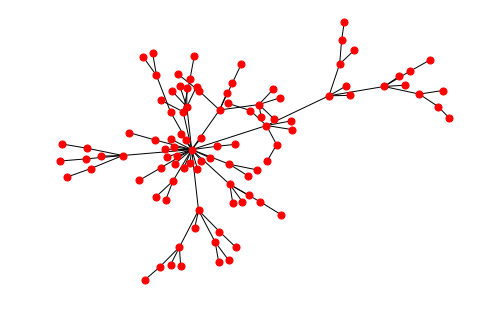

In [43]:
# Here we create our own BA network with preferential attatchment

import random

G = nx.Graph()
G.add_node(0)
G.add_node(1)
G.add_edge(0, 1)

for i in range(2, 100):
    edges = np.array(list(G.edges())).flatten()    
    random_node = random.choice(edges)
    G.add_node(i)
    G.add_edge(i, random_node)
    
nx.draw(G, node_size=50)

Min degree: 1
Max degree: 349


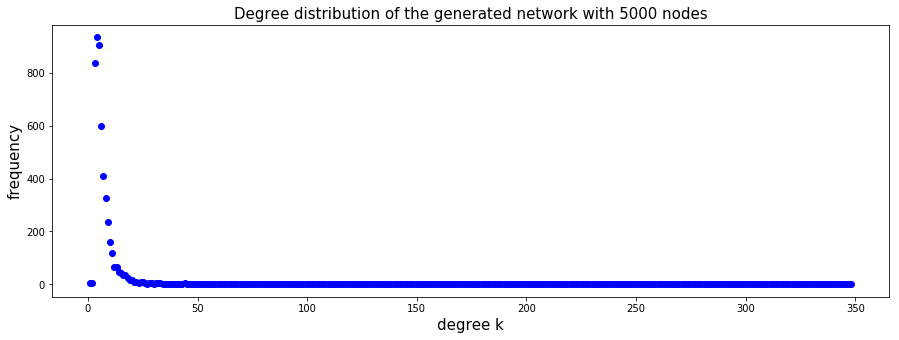

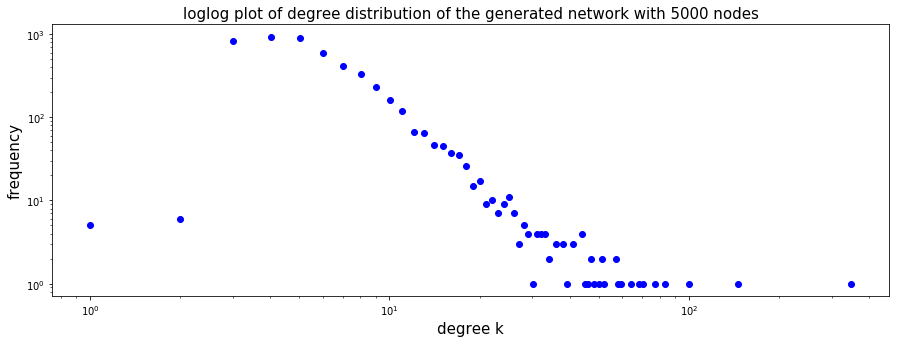

In [47]:
# Here we create a random BA network with 5000 nodes and extract the degree distribution as well
for i in range(100, 5000):
    edges = np.array(list(G.edges())).flatten()    
    random_node = random.choice(edges)
    G.add_node(i)
    G.add_edge(i, random_node)
    
degree_dict = dict(G.degree())
min_degree = np.min(list(degree_dict.values()))
max_degree = np.max(list(degree_dict.values()))

print(f'Min degree: {min_degree}')
print(f'Max degree: {max_degree}')

bins = np.linspace(min_degree, max_degree, max_degree - min_degree)
hist = np.histogram(list(degree_dict.values()), bins = bins)

plt.figure(figsize=(15,5))
plt.plot(hist[1][:-1], hist[0], 'bo')
plt.xlabel('degree k',fontsize=15)
plt.ylabel('frequency',fontsize=15)
plt.title('Degree distribution of the generated network with 5000 nodes',fontsize=15)
plt.show()

plt.figure(figsize=(15,5))
plt.loglog(hist[1][:-1], hist[0], 'bo')
plt.xlabel('degree k',fontsize=15)
plt.ylabel('frequency',fontsize=15)
plt.title('loglog plot of degree distribution of the generated network with 5000 nodes',fontsize=15)
plt.show()

# Part 5 Power-laws and the friendship paradox

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

* Pick a node _i_ at random (e.g. use `random.choice`). [Find its degree](http://networkx.lanl.gov/reference/generated/networkx.Graph.degree.html).
* Find _i_'s [neighbors](http://networkx.lanl.gov/reference/generated/networkx.Graph.neighbors.html). And calculate their average degree.
* Compare the two numbers to check if it's true that _i_'s friends (on average) have more friends than _i_.
* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. 

* Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.

In [48]:
# Here we test if the friendship paradox holds true or not

random_node = random.choice(list(G.nodes()))
random_node_deg = G.degree(random_node)
neighbours = list(G.neighbors(random_node))

neighb_degrees = []
for v in neighbours:
    neighb_degrees.append(G.degree(v))

avg_neighb_degree = np.mean(neighb_degrees)

# print(f"Random node's degree: {random_node_deg}")
# print(f"It's neighbours average degree: {avg_neighb_degree}")

counter = 0

for i in range(1000):
    random_node = random.choice(list(G.nodes()))
    neighbours = list(G.neighbors(random_node))
    neighb_degrees = []
    for v in neighbours:
        neighb_degrees.append(G.degree(v))

    avg_neighb_degree = np.mean(neighb_degrees)
    if avg_neighb_degree < G.degree(random_node):
        counter = counter + 1

print("Number of times when the random node had higher degree than the average of its neighbours' degrees: ", counter)
print(f"The percentage: {counter/10}%")

Number of times when the random node had higher degree than the average of its neighbours' degrees:  126
The percentage: 12.6%


In [49]:
# We create the ER graph
N = 5000
k = np.mean([G.degree(n) for n in G.nodes()])
p = k/(N-1)
er_graph = nx.erdos_renyi_graph(N, p)

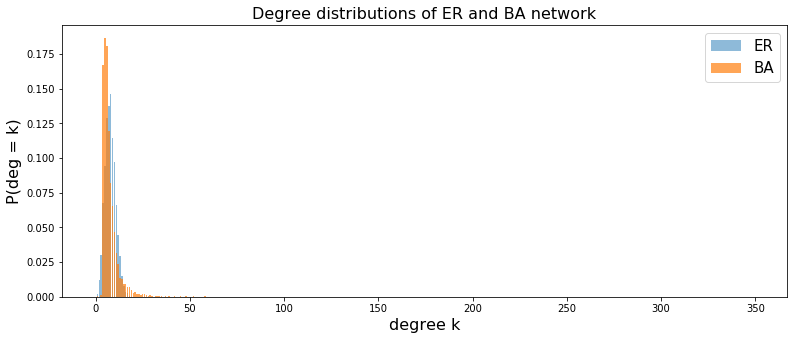

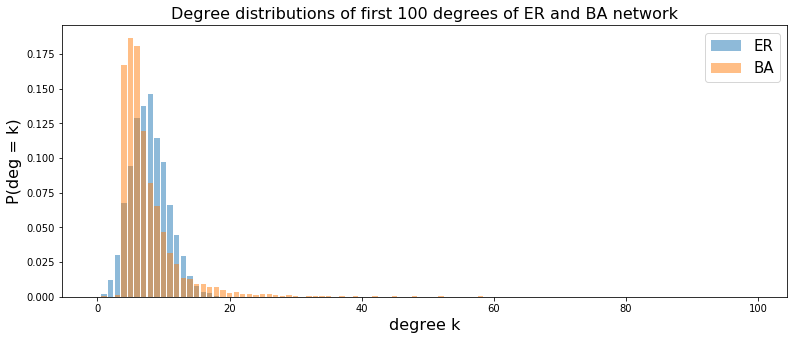

In [74]:
# Plot the degree distribution of both networks
bins_er = np.bincount(list(dict(er_graph.degree()).values()))
bins_to_use = np.arange(len(bins_er))

bins_ba = np.bincount(list(dict(G.degree()).values()))
bins_to_use_ba = np.arange(len(bins_ba))

# Here we see the global distribution
plt.figure(figsize=(13,5))
plt.bar(bins_to_use, bins_er/N, alpha=0.5, label='ER')
plt.bar(bins_to_use_ba, bins_ba/N, alpha=0.7, label ='BA')
plt.xlabel('degree k', fontsize=16)
plt.ylabel('P(deg = k)', fontsize=16)
plt.title('Degree distributions of ER and BA network', fontsize=16)
plt.legend(loc='upper right', fontsize=15)

plt.figure(figsize=(13,5))
plt.bar(bins_to_use, bins_er/N, alpha=0.5, label='ER')
plt.bar(bins_to_use_ba[:100], (bins_ba/N)[:100], alpha=0.5, label='BA')
plt.xlabel('degree k', fontsize=16)
plt.ylabel('P(deg = k)', fontsize=16)
plt.title('Degree distributions of first 100 degrees of ER and BA network', fontsize=16)
plt.legend(loc='upper right', fontsize=15)


Looking at the degree distributions we can see that the BA network actually contains nodes which has quite high degrees compared to the ER. These nodes are the so called 'hubs' that the BA model is able to represent which the ER cannot. As expected the degree distribution of the ER is mostly centered around the average. 